### Import Libraries and Modules

In [2]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
# Import Required Modules
# Import the necessary modules for text preprocessing using TensorFlow's Keras API.

from tensorflow.keras.preprocessing import sequence  # Import the 'sequence' module for sequence preprocessing.
from tensorflow.keras.preprocessing.text import Tokenizer  # Import the 'Tokenizer' class for text tokenization.
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Import 'pad_sequences' for sequence padding.

### Load the Datasets

In [4]:
# Load Datasets

df_train = pd.read_csv("train.csv")  # Load the training dataset from "train.csv" file.
df_test = pd.read_csv("test.csv")    # Load the test dataset from "test.csv" file.


In [5]:
# Print the First Five Records of the Training Set
df_train.head()  # Using the 'head()' method to display the top rows of the DataFrame.


,text,category
0,I am still waiting on my card?,card_arrival
1,What can I do if my card still hasn't arrived ...,card_arrival
2,I have been waiting over a week. Is the card s...,card_arrival
3,Can I track my card while it is in the process...,card_arrival
4,"How do I know if I will get my card, or if it ...",card_arrival


In [6]:
# Print the first five records of the test set.
df_test.head()

,text,category
0,How do I locate my card?,card_arrival
1,"I still have not received my new card, I order...",card_arrival
2,I ordered a card but it has not arrived. Help ...,card_arrival
3,Is there a way to know when my card will arrive?,card_arrival
4,My card has not arrived yet.,card_arrival


### Check the Missing Values

In [7]:
# Check for missing values in the training set and display the count of missing values for each column.
df_train.isnull().sum()

text        0
category    0
dtype: int64

In [8]:
# Check for missing values in the test set and display the count of missing values for each column.
df_test.isnull().sum()

text        0
category    0
dtype: int64

In [9]:
# Remove rows with missing values from the training set.
df_train = df_train.dropna()

# Remove rows with missing values from the test set.
df_test = df_test.dropna()

### Check the Target Balance

In [10]:
# Check the balance of the target variable "category" in the training set.
unique_values = df_train["category"].unique()      # Get unique values in the "category" column.
value_counts = df_train["category"].value_counts()  # Count occurrences of each category.
print(unique_values)  # Print unique categories.
print(value_counts)   # Print counts of each category.

['card_arrival' 'card_linking' 'exchange_rate'
 'card_payment_wrong_exchange_rate' 'extra_charge_on_statement'
 'pending_cash_withdrawal' 'fiat_currency_support'
 'card_delivery_estimate' 'automatic_top_up' 'card_not_working'
 'exchange_via_app' 'lost_or_stolen_card' 'age_limit' 'pin_blocked'
 'contactless_not_working' 'top_up_by_bank_transfer_charge'
 'pending_top_up' 'cancel_transfer' 'top_up_limits'
 'wrong_amount_of_cash_received' 'card_payment_fee_charged'
 'transfer_not_received_by_recipient' 'supported_cards_and_currencies'
 'getting_virtual_card' 'card_acceptance' 'top_up_reverted'
 'balance_not_updated_after_cheque_or_cash_deposit'
 'card_payment_not_recognised' 'edit_personal_details'
 'why_verify_identity' 'unable_to_verify_identity' 'get_physical_card'
 'visa_or_mastercard' 'topping_up_by_card' 'disposable_card_limits'
 'compromised_card' 'atm_support' 'direct_debit_payment_not_recognised'
 'passcode_forgotten' 'declined_cash_withdrawal' 'pending_card_payment'
 'lost_or_sto

### Display the Distribution of Labeled Intents

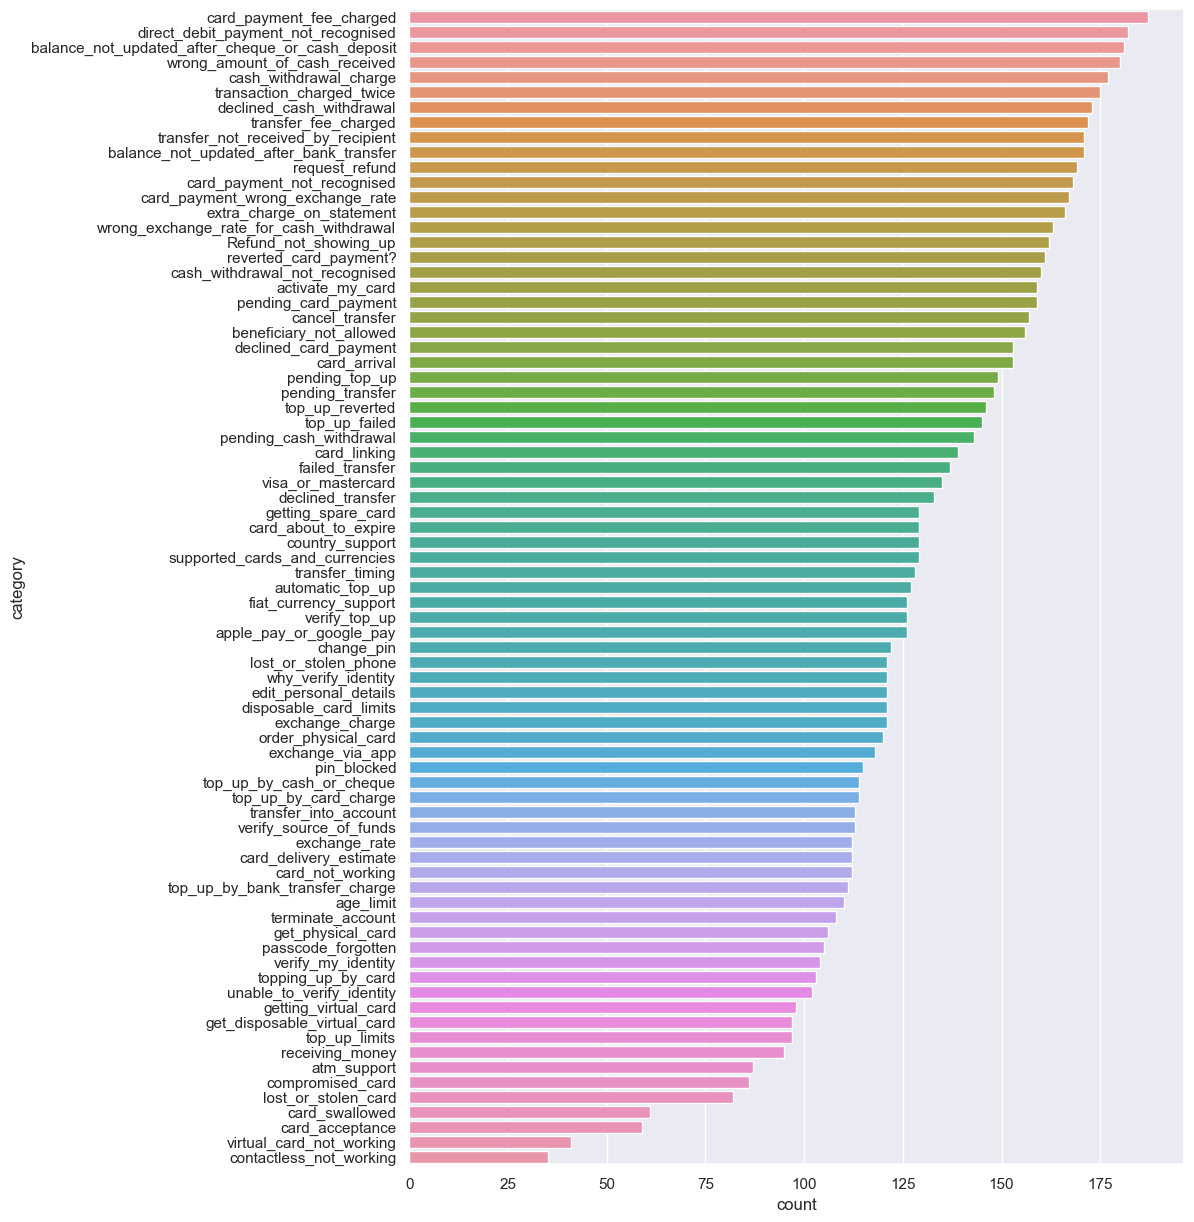

In [11]:
# Display the distribution of the "category" variable in the training set.

## Set the figure size for the plot.
sns.set(rc={"figure.figsize":(10, 15)})

## Create a countplot to visualize the distribution of categories.
sns.countplot(data=df_train, y="category", order=df_train['category'].value_counts().index)

## Show the plot.
plt.show()


### Shuffle the Dataset

In [12]:
# Shuffle the training dataset.
df_train = df_train.sample(frac=1)

### Transform the Data

In [13]:
# Transform the data by extracting the "text" column and converting it to NumPy arrays.

train_data = df_train['text'].to_numpy()  # Extract and convert the "text" column of the training dataset.
test_data = df_test['text'].to_numpy()    # Extract and convert the "text" column of the test dataset.

### Tokenize the Words

In [14]:
# Set the configuration parameters for tokenization.

vocab_size = 5000  # Define the vocabulary size for tokenization.
oov_tok = '<OOV>'  # Define the out-of-vocabulary token (used for words not in the vocabulary).

In [15]:
# Use TensorFlow's Tokenizer to convert words to integers.

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)  # Initialize the Tokenizer.
tokenizer.fit_on_texts(train_data)  # Fit the Tokenizer on the training data.


In [16]:
# Convert each text into a sequence of integers using the Tokenizer.

train_sequences = tokenizer.texts_to_sequences(train_data)  # Convert training text to sequences.
test_sequences = tokenizer.texts_to_sequences(test_data)    # Convert test text to sequences.


### Pad the Training and Test Sequences

In [17]:
# Set the configuration parameters for sequence padding.

max_length = 50       # Define the maximum sequence length.
trunc_type = 'post'   # Define the truncation type (post or pre).
padding_type = 'post' # Define the padding type (post or pre).

In [18]:
# Perform sequence padding on the training and test sequences.

x_train = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
x_test = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

### Encode the Labels

In [19]:
# Convert the "category" column of training and test datasets into numerical labels.

train_labels = pd.Categorical(df_train['category']).codes  # Convert training labels.
test_labels = pd.Categorical(df_test['category']).codes    # Convert test labels.

In [20]:
# Reshape the arrays of encoded labels into two-dimensional arrays.

y_train = train_labels.reshape((10003, 1))  # Reshape the training labels array.
y_test = test_labels.reshape((3080, 1))      # Reshape the test labels array.

### Prepare a Validation Set

In [21]:
# Prepare a validation set by splitting the training data.

partial_x_train = x_train[:9000]  # Select the first 9000 samples for training.
partial_y_train = y_train[:9000]  # Corresponding labels for the first 9000 samples.

x_val = x_train[9000:]  # Select the remaining samples for validation.
y_val = y_train[9000:]  # Corresponding labels for the validation set.


### Define a Neural Network Architecture

In [22]:
# Define the neural network architecture.

embedding_dim = 64  # Define the embedding dimension.

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(77, activation='softmax')
])

# Display a summary of the model architecture.
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 77)                5005      
                                                                 
Total params: 399,309
Trainable params: 399,309
Non-trainable params: 0
_________________________________________________________________


2023-12-30 17:50:42.321163: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-30 17:50:42.322233: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-30 17:50:42.322902: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

### Fit the Model

In [23]:
# Set the training configuration for the model.

model.compile(loss='sparse_categorical_crossentropy',  # Specify the loss function.
              optimizer='adam',                       # Specify the optimizer.
              metrics=['accuracy'])                   # Specify evaluation metrics.


In [24]:
# Fit the model with the partial training dataset.

num_epochs = 20  # Define the number of training epochs.

history = model.fit(partial_x_train,                  # Training data (features).
                    partial_y_train,                  # Training labels.
                    epochs=num_epochs,               # Number of training epochs.
                    validation_data=(x_val, y_val),  # Validation data and labels.
                    verbose=2)                       # Verbosity level (2 displays progress per epoch).


Epoch 1/20


2023-12-30 17:51:28.982133: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-12-30 17:51:29.129826: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-30 17:51:29.130593: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-30 17:51:29.131145: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG IN

282/282 - 6s - loss: 3.8902 - accuracy: 0.0739 - val_loss: 2.9066 - val_accuracy: 0.2373 - 6s/epoch - 21ms/step
Epoch 2/20
282/282 - 4s - loss: 2.0911 - accuracy: 0.4159 - val_loss: 1.6351 - val_accuracy: 0.5184 - 4s/epoch - 15ms/step
Epoch 3/20
282/282 - 4s - loss: 1.2191 - accuracy: 0.6570 - val_loss: 1.2027 - val_accuracy: 0.6680 - 4s/epoch - 15ms/step
Epoch 4/20
282/282 - 4s - loss: 0.8344 - accuracy: 0.7654 - val_loss: 1.0244 - val_accuracy: 0.7468 - 4s/epoch - 15ms/step
Epoch 5/20
282/282 - 4s - loss: 0.6239 - accuracy: 0.8273 - val_loss: 0.8778 - val_accuracy: 0.7807 - 4s/epoch - 15ms/step
Epoch 6/20
282/282 - 4s - loss: 0.4822 - accuracy: 0.8682 - val_loss: 0.9292 - val_accuracy: 0.7647 - 4s/epoch - 15ms/step
Epoch 7/20
282/282 - 4s - loss: 0.3915 - accuracy: 0.8898 - val_loss: 0.8716 - val_accuracy: 0.7717 - 4s/epoch - 15ms/step
Epoch 8/20
282/282 - 4s - loss: 0.3229 - accuracy: 0.9124 - val_loss: 0.8352 - val_accuracy: 0.8026 - 4s/epoch - 15ms/step
Epoch 9/20
282/282 - 4s - l

### Plot Training and Validation Loss Curves

In [25]:
# Convert the training history to a pandas DataFrame and rename the "loss" column.

df_history = pd.DataFrame(history.history)     # Create a DataFrame from the training history.
df_history.rename(columns={"loss": "train_loss"}, inplace=True)  # Rename the "loss" column.


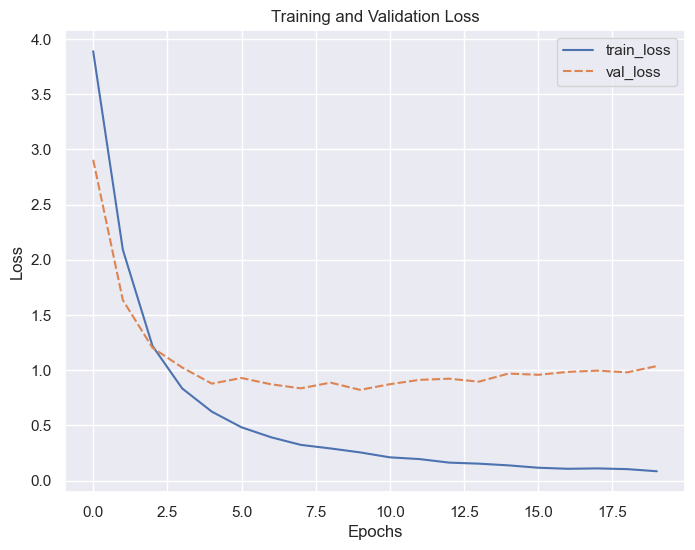

In [26]:
# Plot training and validation loss curves.

## Set the figure size for the plot.
sns.set(rc={"figure.figsize":(8, 6)})

## Create a line plot for training and validation loss.
my_plot = sns.lineplot(data=df_history[["train_loss", "val_loss"]])

## Set labels and title.
my_plot.set_xlabel('Epochs')
my_plot.set_ylabel("Loss")
my_plot.set_title("Training and Validation Loss")

## Show the plot.
plt.show()

### Retrain the Model

In [27]:
# Define the number of epochs for retraining.
num_epochs = 14

# Define and compile the model.
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(77, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Retrain the model using the entire training dataset.
model.fit(x_train, y_train, epochs=num_epochs, verbose=2)


Epoch 1/14


2023-12-30 17:57:39.037346: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-30 17:57:39.037820: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-30 17:57:39.038513: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

313/313 - 6s - loss: 3.7916 - accuracy: 0.0730 - 6s/epoch - 18ms/step
Epoch 2/14
313/313 - 5s - loss: 2.3202 - accuracy: 0.3253 - 5s/epoch - 14ms/step
Epoch 3/14
313/313 - 4s - loss: 1.4845 - accuracy: 0.5600 - 4s/epoch - 14ms/step
Epoch 4/14
313/313 - 4s - loss: 1.0228 - accuracy: 0.7059 - 4s/epoch - 14ms/step
Epoch 5/14
313/313 - 5s - loss: 0.7500 - accuracy: 0.7880 - 5s/epoch - 15ms/step
Epoch 6/14
313/313 - 5s - loss: 0.5625 - accuracy: 0.8393 - 5s/epoch - 15ms/step
Epoch 7/14
313/313 - 5s - loss: 0.4565 - accuracy: 0.8696 - 5s/epoch - 15ms/step
Epoch 8/14
313/313 - 5s - loss: 0.3724 - accuracy: 0.8952 - 5s/epoch - 15ms/step
Epoch 9/14
313/313 - 5s - loss: 0.3098 - accuracy: 0.9091 - 5s/epoch - 15ms/step
Epoch 10/14
313/313 - 5s - loss: 0.2782 - accuracy: 0.9185 - 5s/epoch - 15ms/step
Epoch 11/14
313/313 - 5s - loss: 0.2448 - accuracy: 0.9279 - 5s/epoch - 14ms/step
Epoch 12/14
313/313 - 5s - loss: 0.2001 - accuracy: 0.9414 - 5s/epoch - 15ms/step
Epoch 13/14
313/313 - 5s - loss: 0.1

### Examine the Model’s Performance with the Test Dataset

In [28]:
# Examine the model's performance with the test dataset.

results = model.evaluate(x_test, y_test)

2023-12-30 18:00:12.527488: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-30 18:00:12.528309: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-30 18:00:12.529076: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

97/97 [==============================] - 1s 4ms/step - loss: 0.8243 - accuracy: 0.8211


### Predict the Outcomes for New Data

In [29]:
# Convert query text samples into padded sequences.

input_text = ["I am still waiting for my card, when will it arrive?",
              "Which fiat currency do you support?",
              "Help, I just lost my card!"]

input_text_arr = np.array(input_text)  # Convert the input text to a NumPy array.
input_text_sequences = tokenizer.texts_to_sequences(input_text_arr)  # Convert text to sequences.
input_text_padded = pad_sequences(input_text_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)  # Pad sequences.

In [30]:
# Use the trained model to predict outcomes for the query text samples.

predictions = model.predict(input_text_padded)     # Make predictions for the input text.
predicted_classes = np.argmax(predictions, axis=1) # Get the class with the highest probability.

1/1 [==============================] - 0s 282ms/step


2023-12-30 18:00:29.763715: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-30 18:00:29.764232: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-30 18:00:29.764983: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

### Match Predictions with Severity Levels

In [34]:
# Convert category labels to numerical codes.
df_train['category_codes'] = pd.Categorical(df_train['category']).codes

# Create a reference DataFrame containing category labels and their numerical codes.
df_ref = df_train[["category", "category_codes"]]
df_ref = df_ref.drop_duplicates()
df_ref = df_ref.reset_index(drop=True)

# Initialize a list to store predicted category labels.
predicted_categories = []

# Map predicted class indices to category labels.
for x in predicted_classes:
    target_code = x
    category = df_ref[df_ref["category_codes"] == target_code]["category"].values[0]
    predicted_categories.append(category)

In [35]:
# Read the severity levels CSV file.
df_severity = pd.read_csv("severity_levels.csv")

# Loop through predicted categories and print the category and its severity level.
for y in predicted_categories:
    target_index = df_severity[df_severity["category"] == y].index.values[0]
    level = df_severity._get_value(target_index, 'severity_level')

    # Print predicted category and severity level.
    print("Predicted Category: " + y)
    print("Severity Level: " + level)
    print("\n")

Predicted Category: card_arrival
Severity Level: Medium


Predicted Category: fiat_currency_support
Severity Level: Low


Predicted Category: lost_or_stolen_card
Severity Level: High


